### 농구 선수의 게임 데이터를 활용한 포지션 예측을 위한 데이터 정제
NBA 농구 선수들의 게임 기록을 데이터로 사용해서 특정 농구 선수의 포지션을 예측

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../Data/basketball.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


- Pos : 포지션 (SG : Shooting Guard, C : Center)
- 3P : 한 경기당 평균 3점슛 성공 횟수
- 2P : 한 경기당 평균 2점슛 성공 횟수
- TRB : 한 경기당 평균 리바운드 성공 횟수
- AST : 한 경기당 평균 어시스트 성공 횟수
- STL : 한 경기당 평균 스틸 성공 횟수
- BLK : 한 경기당 평균 블락 성공 횟수

In [5]:
df['Pos'].unique()

array(['SG', 'C'], dtype=object)

In [7]:
# 포지션별 개수 파악
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

### 포지션 별 내용
- C: Center는 골대, 포스트 근처에서 슛을 블로킹하고, 리바운드 하며, 바깥으로 쳐내며, 골대 근처에서 2점슛으로 득점을 내기도 한다.
- SG: Shooting Guard는 코트내에서 3점슛 등 장거리에서 슛을해서 점수를 얻는 역할.

In [9]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 스틸, 2점슛 시각화

In [10]:
import seaborn as sns

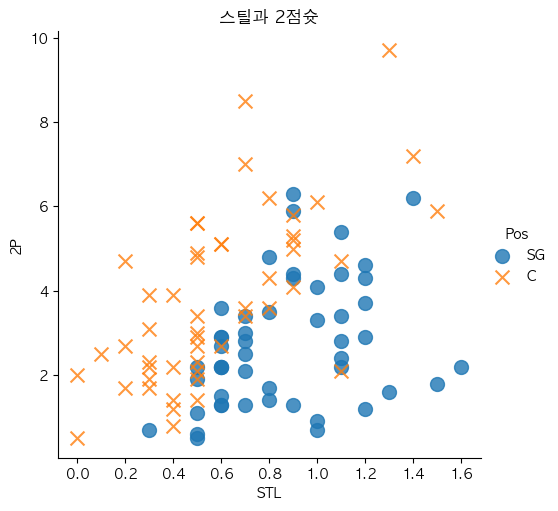

In [16]:
sns.lmplot(x='STL', y='2P',
    data=df,
    fit_reg=False,
    scatter_kws={'s':100}, # 좌표상의 점의 크기
    markers=['o','x'],
    hue='Pos' # 대상값
)
plt.title('스틸과 2점슛')
plt.show()

### 어시스트, 2점슛

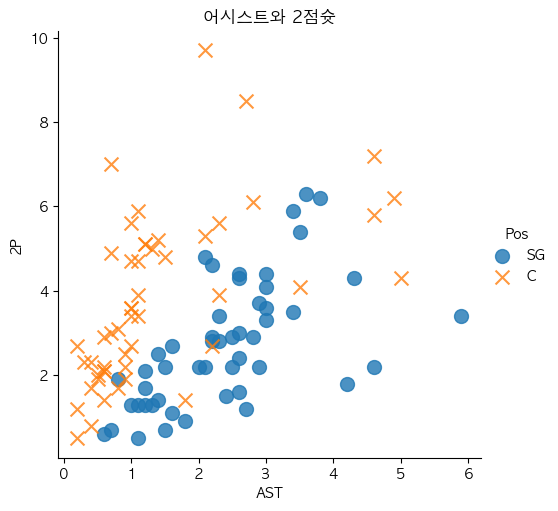

In [18]:
sns.lmplot(x='AST', y='2P',
    data=df,
    fit_reg=False,
    scatter_kws={'s':100}, # 좌표상의 점의 크기
    markers=['o','x'],
    hue='Pos' # 대상값
)
plt.title('어시스트와 2점슛')
plt.show()

### 블로킹과 3점슛

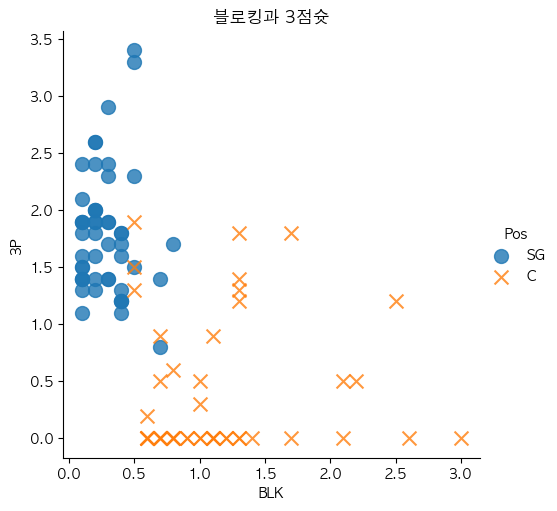

In [19]:
sns.lmplot(x='BLK', y='3P',
    data=df,
    fit_reg=False,
    scatter_kws={'s':100}, # 좌표상의 점의 크기
    markers=['o','x'],
    hue='Pos' # 대상값
)
plt.title('블로킹과 3점슛')
plt.show()

### 리바운드와 3점슛

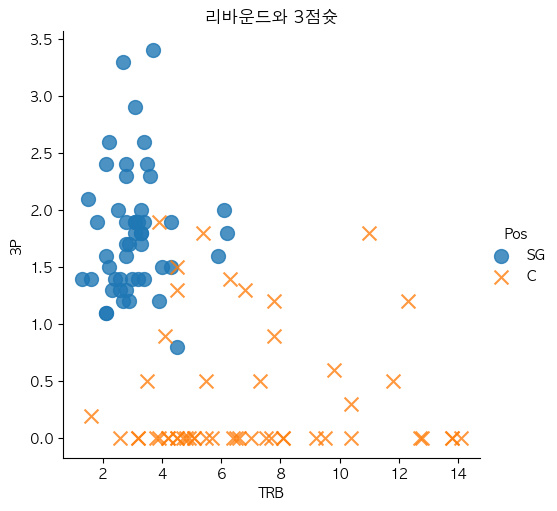

In [20]:
sns.lmplot(x='TRB', y='3P',
    data=df,
    fit_reg=False,
    scatter_kws={'s':100}, # 좌표상의 점의 크기
    markers=['o','x'],
    hue='Pos' # 대상값
)
plt.title('리바운드와 3점슛')
plt.show()

### 데이터 다듬기
- 분별력이 없는 Feature을 데이터에서 제거
- 시각화를 통해 확인해 본 결과 2P, AST, STL은 분별력이 없다.

In [21]:
df.drop(['2P','AST','STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


### 학습 데이터와 검증 데이터로 나누기

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# 다듬어진 데이터에서 20%를 테스트 데이터로 분류 합니다.
train, test = train_test_split(df, test_size=0.2)

In [24]:
train.shape

(80, 5)

In [25]:
test.shape

(20, 5)

In [26]:
# 데이터 저장하기
train.to_csv('../Data/basketball_train.csv', index=False)
test.to_csv('../Data/basketball_test.csv', index=False)